## We are going to analyse the excel sheet using python and discover things about the dataset that would be rather difficult to find out just by looking at the spreadsheet

-  Cleaned this [Dataset](http://data.covid19india.org/) using MS Excel which had counts of positive cases of the Country on an everyday basis. The cleaned data is passed into the dataframe
-  Also take a look at the visualisations made by me and my teammate in [Tableau Public](http://public.tableau.com/views/Covid19India_16661602396190/CompleteIndiaAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link)

![](http://images.indianexpress.com/2022/01/COVID-19-1-2-1.jpg)

In [95]:
#import the necessary analysis and visualization libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
#read the no. of tests csv file into the notebook
dt = pd.read_csv('../input/covid-india/Total-Tests.csv')
dt.head()

,State,April,May,June,July,August,September,October,November,December,January
0,Andhra Pradesh,94558,278190,612000,1061586,1771136,2083646,2222347,2028949,1767712,398636
1,Arunachal Pradesh,694,7589,16648,57628,85750,80824,70040,40644,19028,4550
2,Assam,10435,98662,313552,505181,1345432,1260603,1134409,656350,683261,157896
3,Bihar,22672,53065,167825,327282,2638989,4078989,3656873,3741408,3672291,745696
4,Chandigarh,1147,3507,4182,6270,16418,47112,29526,35311,38860,9370


In [97]:
#read the no. of cases csv file into the notebook
dc = pd.read_csv('../input/covid-india/total-cases.csv')
dc.head()

,State,Population,April,May,June,July,August,September,October,November,December,January
0,Andhra Pradesh,53903393,1403,2168,12427,126338,293838,258713,129864,44716,14222,2204
1,Arunachal Pradesh,1570458,1,2,189,1400,2521,5684,5056,1430,437,45
2,Assam,35607039,42,1297,6538,32434,68771,71771,25540,6425,3435,320
3,Bihar,124799926,422,3399,6345,41243,85350,46569,33858,18852,17176,3134
4,Chandigarh,1158473,74,219,221,611,3295,7592,2480,2991,2339,453


In [98]:
#from this we can see that all the columns have 30 values and their are no NULL values which could cause trouble in our analysis
dt.count()

State        30
April        30
May          30
June         30
July         30
August       30
September    30
October      30
November     30
December     30
January      30
dtype: int64

In [99]:
#here we see that the month of september recorded highest no. of cases in a certain state which was during the 1st wave
dc.describe().tail(1)

,Population,April,May,June,July,August,September,October,November,December,January
max,237882725.0,10498.0,57157.0,117604.0,247357.0,370423.0,591905.0,293960.0,183668.0,157951.0,40141.0


In [100]:
# Here we see which month had the highest no. of active cases across the Nation
dc.iloc[ : ,1: ].sum().sort_values(ascending = False).head(5)

Population    1364234466
September        2613780
August           1986394
October          1864345
November         1272166
dtype: int64

In [101]:
#Get the name of the states where no. of cases were more than 30000 in the month of july
# Here you can get the data of any month by changing the name of the month
dc[dc['June']>30000]['State']

14    Maharashtara
20      Tamil Nadu
28           Delhi
Name: State, dtype: object

In [102]:
#Get the name of the states where no. of tests conducted were more than 30000 in the month of july
dt[dt['July']>30000]['State']

0        Andhra Pradesh
1     Arunachal Pradesh
2                 Assam
3                 Bihar
5           Chhatisgarh
6                   Goa
7               Gujarat
8               Haryana
9      Himachal Pradesh
10            Jharkhand
11            Karnataka
12               Kerala
13       Madhya Pradesh
14         Maharashtara
15              Manipur
17               Odisha
18               Punjab
19            Rajasthan
20           Tamil Nadu
21            Telangana
22              Tripura
23        Uttar Pradesh
24          Uttarakhand
25          West Bengal
27    Jammu and Kashmir
28                Delhi
Name: State, dtype: object

In [103]:
#Get the name of the states where no. of cases were more than 50000 but less than 100000 in the month of july
# we can analyse this further more just by changing the name of the month
dc[(dc['July']>50000)&(dc['July']<100000)]['State']

23    Uttar Pradesh
25      West Bengal
Name: State, dtype: object

In [104]:
#Here we can get the entire row which had maximum no. of cases in a particular month
# we can change the max function to min and also the month name as per our requirements
dc[dc['September']==dc['September'].max()]

,State,Population,April,May,June,July,August,September,October,November,December,January
14,Maharashtara,123144223,10498,57157,117604,247357,370423,591905,293960,145490,108216,29863


In [105]:
#We need to find out names of 5 states where the number of tests were minimum in the month of January
#Here we can change the ascending keyword by descending in order to get the reverse of the above query i.e. top 5 states with max no. of tests
#Also we can change the name of the month according to our requirements
#We can also change dt by dc to analyse the no. of cases table
dt[["State", "January"]].sort_values(by ='January', ascending= True ).head(5)

,State,January
16,Nagaland,1340
1,Arunachal Pradesh,4550
26,Andaman and Nicobar Islands,8391
22,Tripura,8722
4,Chandigarh,9370


In [106]:
#Have a close analysis between these states by dropping the other rows
dc1 = dc.drop([0,1,2,3,4,5,6,8,9,11,12,14,15,16,17,18,19,21,22,24,25,26,27,29])
dc1.head()

,State,Population,April,May,June,July,August,September,October,November,December,January
7,Gujarat,63872399,4395,12384,20173,28778,34965,40932,35550,36836,35258,5560
10,Jharkhand,38593948,105,505,1881,8928,30342,41995,18110,7390,5962,1323
13,Madhya Pradesh,85358965,2625,5464,8397,17945,32159,64082,43312,34769,35663,5645
20,Tamil Nadu,77841267,2323,20010,70157,155692,182182,169561,126920,57393,36099,6762
23,Uttar Pradesh,237882725,2203,5242,18250,61969,144953,168668,82781,62025,41078,6644


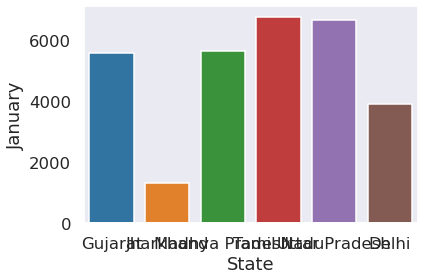

In [107]:
#Visualize the above table in a bar graph
#we can add or subtract as many states as we want and analyse the data according to our requirement
sns.barplot(x='State', y='January', data=dc1)

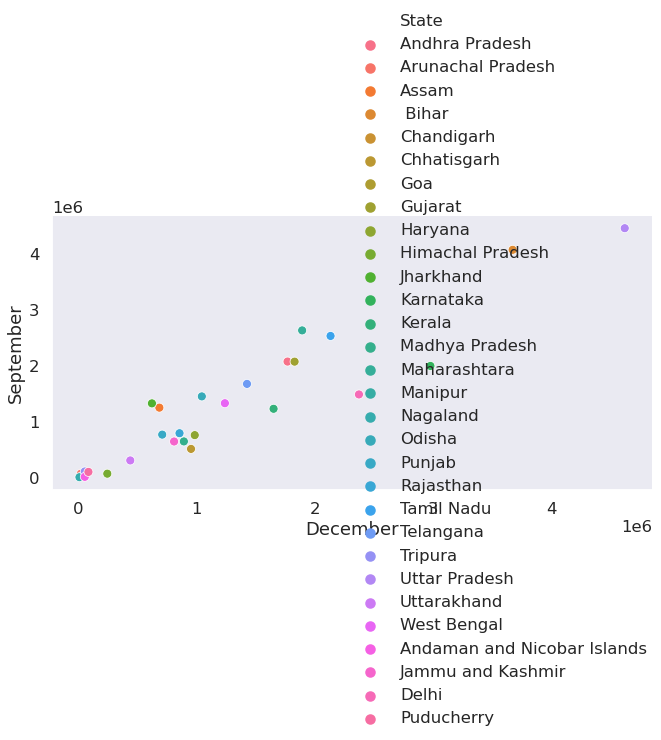

In [108]:
#Made a scatter plot between the 2 months when the no. of tests conducted were lowest and highest 

sns.relplot(x='December',y='September', data=dt, hue='State');

In [109]:
#Now we sum the no. of cases in all the months columns and store them in a new column called Sum
dc2 = pd.read_csv('../input/covid-india/total-cases.csv')
dc2['Sum'] = dc2['April'] + dc2['May'] + dc2['June']+ dc2['July'] + dc2['August'] + dc2['September'] + dc2['October'] + dc2['November'] + dc2['December']  
dc2.head()

,State,Population,April,May,June,July,August,September,October,November,December,January,Sum
0,Andhra Pradesh,53903393,1403,2168,12427,126338,293838,258713,129864,44716,14222,2204,883689
1,Arunachal Pradesh,1570458,1,2,189,1400,2521,5684,5056,1430,437,45,16720
2,Assam,35607039,42,1297,6538,32434,68771,71771,25540,6425,3435,320,216253
3,Bihar,124799926,422,3399,6345,41243,85350,46569,33858,18852,17176,3134,253214
4,Chandigarh,1158473,74,219,221,611,3295,7592,2480,2991,2339,453,19822


In [110]:
#By this we can get the total number of cases in all the months for the State(which ever name you select) 
#Replace dc2 by dt for analysing no. of tests dataframe
dc2.loc[dc2['State']=='Assam', 'Sum']

2    216253
Name: Sum, dtype: int64

In [111]:
#Get the name of those states where the total no. of cases in all the months were more than 300000
dc2[dc2['Sum']>300000][['State', 'Sum']]

,State,Sum
0,Andhra Pradesh,883689
11,Karnataka,920061
12,Kerala,761431
14,Maharashtara,1942610
17,Odisha,329763
19,Rajasthan,310764
20,Tamil Nadu,820337
23,Uttar Pradesh,587169
25,West Bengal,552821
28,Delhi,628884


In [112]:
#Let's find out that what percentage of population in each state was tested positive from April to January and store this info in a new column
#PoPI = percentage of population infected
dc2['PoPI'] = (dc2['Sum']/dc2['Population'])*100
dc2.head(5)

,State,Population,April,May,June,July,August,September,October,November,December,January,Sum,PoPI
0,Andhra Pradesh,53903393,1403,2168,12427,126338,293838,258713,129864,44716,14222,2204,883689,1.639394
1,Arunachal Pradesh,1570458,1,2,189,1400,2521,5684,5056,1430,437,45,16720,1.064658
2,Assam,35607039,42,1297,6538,32434,68771,71771,25540,6425,3435,320,216253,0.607332
3,Bihar,124799926,422,3399,6345,41243,85350,46569,33858,18852,17176,3134,253214,0.202896
4,Chandigarh,1158473,74,219,221,611,3295,7592,2480,2991,2339,453,19822,1.711045


In [113]:
#let's arrange the columns in descending order and get the top 7 values
#This shows the top 5 states where the percentage of the total population infected was maximum
#Increase the head value from 5 to get info. about more states
dc2.groupby('State').PoPI.sum().sort_values(ascending = False).head(7)

State
Delhi             3.361053
Goa               3.219732
Puducherry        2.698187
Kerala            2.132893
Chandigarh        1.711045
Andhra Pradesh    1.639394
Maharashtara      1.577508
Name: PoPI, dtype: float64

## Visual representation of top 7 states with highest PoPI

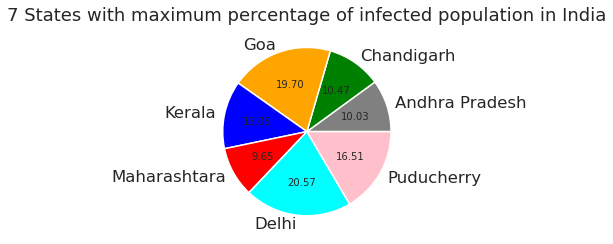

In [114]:
dc3 = dc2[dc2['PoPI']>1.55][['State', 'PoPI']]
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
colors = ["grey", "green", "orange", "blue", 'red', 'cyan', 'pink']
plt.pie(dc3['PoPI'], labels=dc3['State'], colors=colors, autopct="%.2f")
plt.title("7 States with maximum percentage of infected population in India")
plt.ylabel("")
plt.show()

In [115]:
#let's arrange the columns in ascending order and get the top 7 values
#This shows the top 5 states where the percentage of the total population infected was minimum
dc2.groupby('State').PoPI.sum().sort_values(ascending = True).head(7)

State
 Bihar            0.202896
Uttar Pradesh     0.246831
Madhya Pradesh    0.286339
Jharkhand         0.298539
Rajasthan         0.383504
Gujarat           0.390264
Nagaland          0.530205
Name: PoPI, dtype: float64

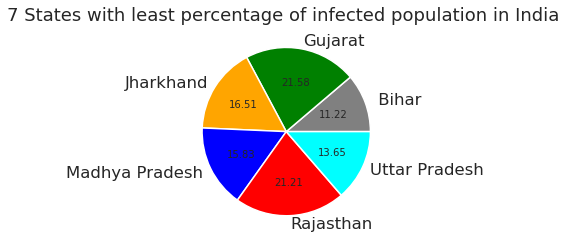

In [116]:
dc4 = dc2[dc2['PoPI']<0.52][['State', 'PoPI']]
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
colors = ["grey", "green", "orange", "blue", 'red', 'cyan', 'pink']
plt.pie(dc4['PoPI'], labels=dc4['State'], colors=colors, autopct="%.2f")
plt.title("7 States with least percentage of infected population in India ")
plt.ylabel("")
plt.show()

In [117]:
#Now let's find out the number of cases in all of the states during the first wave i.e. in the months of August, Sept. and Oct.
dc.groupby('State')['August','September','October'].sum().sort_values(by='August').head(5)

,August,September,October
State,,,
Nagaland,2258,2213,2884
Arunachal Pradesh,2521,5684,5056
Andaman and Nicobar Islands,2584,703,497
Chandigarh,3295,7592,2480
Himachal Pradesh,3552,8860,7083


In [118]:
#Here we can compare the population of the states and it's infected population
#change the value of the head as per your wish to see more rows
dc2.groupby('State')['Population','PoPI'].sum().sort_values(by='Population').head(5)

,Population,PoPI
State,,
Andaman and Nicobar Islands,417036,1.193662
Chandigarh,1158473,1.711045
Puducherry,1413542,2.698187
Arunachal Pradesh,1570458,1.064658
Goa,1586250,3.219732


## This is a continuation of the above analysis after the month of January 2021

In [119]:
#read the no. of cases csv file into the notebook
df = pd.read_csv('../input/covid-india-2/Total Cases 2.csv')
df.head()

,States,January,February,March,April,May,June,July,August,September,October,Population
0,Andaman and Nicobar Islands,49,26,63,866,1056,462,70,29,55,30,417036
1,Andhra Pradesh,5550,2080,12073,199701,591395,196428,76662,47941,36208,16126,53903393
2,Arunachal Pradesh,109,8,9,1574,8853,8585,12265,4909,1595,529,1570458
3,Assam,930,396,875,34711,158093,97268,57714,23228,12737,8482,35607039
4,Bihar,7927,1815,2993,204790,236444,15153,2921,873,250,140,124799926


In [120]:
df.describe()

,January,February,March,April,May,June,July,August,September,October,Population
count,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,15707.833333,11757.433333,36916.566667,2.306849e+05,2.990627e+05,73545.600000,40123.966667,37346.366667,30430.800000,16312.500000,4.547448e+07
std,33624.644846,32185.003213,118692.886331,3.425182e+05,3.296025e+05,115886.100003,93700.300995,122909.573193,113568.698017,52960.634209,5.175063e+07
min,49.000000,8.000000,9.000000,8.660000e+02,1.056000e+03,462.000000,70.000000,29.000000,55.000000,30.000000,4.170360e+05
25%,1447.500000,849.500000,3008.000000,3.343750e+04,7.122125e+04,10826.500000,2037.250000,878.250000,477.250000,364.250000,4.990334e+06
50%,5561.000000,2099.500000,7155.500000,1.294780e+05,2.066685e+05,14628.000000,4180.500000,2980.500000,1430.000000,884.000000,3.287421e+07
75%,14830.000000,6270.500000,31094.000000,2.670750e+05,3.366685e+05,84240.750000,28590.750000,19297.250000,11530.000000,7736.500000,6.664011e+07
max,168245.000000,130225.000000,657910.000000,1.789492e+06,1.144420e+06,397586.000000,466595.000000,666472.000000,623625.000000,287799.000000,2.378827e+08


In [121]:
# Here we see which month had the highest no. of active cases across the Nation
df.iloc[ : ,1: ].sum().sort_values(ascending = False).head(5)

Population    1364234466
May              8971880
April            6920546
June             2206368
July             1203719
dtype: int64

In [122]:
#We need to find out names of 5 states where the number of cases were maximum in the month of May
#Here we can change the ascending keyword by descending in order to get the reverse of the above query
#Also we can change the name of the month according to our requirements
df[["States", "May"]].sort_values(by ='May', ascending= False ).head(5)

,States,May
17,Maharashtra,1144420
14,Karnataka,1081289
15,Kerala,955396
24,Tamil Nadu,929760
1,Andhra Pradesh,591395


In [123]:
df['Sum'] = df['January'] + df['February'] + df['March'] +df['April'] + df['May'] + df['June']+ df['July'] + df['August'] + df['September'] 
df.head()

,States,January,February,March,April,May,June,July,August,September,October,Population,Sum
0,Andaman and Nicobar Islands,49,26,63,866,1056,462,70,29,55,30,417036,2676
1,Andhra Pradesh,5550,2080,12073,199701,591395,196428,76662,47941,36208,16126,53903393,1168038
2,Arunachal Pradesh,109,8,9,1574,8853,8585,12265,4909,1595,529,1570458,37907
3,Assam,930,396,875,34711,158093,97268,57714,23228,12737,8482,35607039,385952
4,Bihar,7927,1815,2993,204790,236444,15153,2921,873,250,140,124799926,473166


In [124]:
#Let's find out that what percentage of population in each state was tested positive from April to January and store this info in a new column
#PoPI = percentage of population infected
df['PoPI'] = (df['Sum']/df['Population'])*100
df.head(5)

,States,January,February,March,April,May,June,July,August,September,October,Population,Sum,PoPI
0,Andaman and Nicobar Islands,49,26,63,866,1056,462,70,29,55,30,417036,2676,0.641671
1,Andhra Pradesh,5550,2080,12073,199701,591395,196428,76662,47941,36208,16126,53903393,1168038,2.166910
2,Arunachal Pradesh,109,8,9,1574,8853,8585,12265,4909,1595,529,1570458,37907,2.413754
3,Assam,930,396,875,34711,158093,97268,57714,23228,12737,8482,35607039,385952,1.083921
4,Bihar,7927,1815,2993,204790,236444,15153,2921,873,250,140,124799926,473166,0.379140


In [125]:
#let's arrange the columns in descending order and get the top 5 values
#This shows the top 5 states where the percentage of the total population infected was maximum
#Increase the head value from 5 to get info. about more states
df.groupby('States').PoPI.sum().sort_values(ascending = False).head(5)

States
Kerala        10.980351
Goa            7.903231
Puducherry     6.242121
Delhi          4.347723
Chandigarh     3.926030
Name: PoPI, dtype: float64

In [126]:
#let's arrange the columns in ascending order and get the top 5 values
#This shows the top 5 states where the percentage of the total population infected was minimum
df.groupby('States').PoPI.sum().sort_values(ascending = True).head(5)

States
Bihar                          0.379140
Uttar Pradesh                  0.472852
Jharkhand                      0.604014
Andaman and Nicobar Islands    0.641671
Madhya Pradesh                 0.645205
Name: PoPI, dtype: float64

In [127]:
#Now let's find out the number of cases in all of the states{in descending order} during the second wave i.e. in the months of April and May
df[["States", 'April', "May"]].sort_values(by ='May', ascending= False ).head(5)

,States,April,May
17,Maharashtra,1789492,1144420
14,Karnataka,526138,1081289
15,Kerala,446599,955396
24,Tamil Nadu,280083,929760
1,Andhra Pradesh,199701,591395


## Inferences from the analysis from April 2020 to October 2021
*  Spread of the number of cases in top 5 states contributed to approximately half of the country’s total cases in 2020 as well as in 2021.
* There  was  only  a  single  wave  in  the  country till January 2020 (as seen from the upward trend in the graphs) but now as the no. of cases are on a steep rise, we can expect another lockdown soon enough.
* Positive  percentage  kept  on  reducing  as  the  year 2020 progressed. But due to slow implementation of vaccination program as well as leniency in Covid protocols, India saw a huge spike in the 2nd wave.
* We saw a huge downfall in the no. of cases from the Month of June 2021 which gave the Govt. of India an opportunity to boost manufacturing and supply chain
* Goa, Chandigarh and Himachal had highest PoPV while it was the least in UP, Bihar.
* States like Kerala, Goa, Delhi were the major contributors for positive cases while states of Bihar, MP and UP contributed the least in 2021
* The maximum percentage of the total population that was infected with the virus among was 3.36% which was in Delhi while the least was in Bihar in 2020.

# Some advanced visualizations

In [128]:
from matplotlib import cm
import geopandas as gpd
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
import plotly.graph_objects as go

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx
/kaggle/input/covid-india/total-cases.csv
/kaggle/input/covid-india/Total-Tests.csv
/kaggle/input/covid-india-2/Total Cases 2.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [129]:

#importing main dataset 
df = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

#importing tests dataset
tests = pd.read_csv('/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv' )
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

df.tail()

#This dataset contains information about number of confirmed , deaths and cured in each state daily . This dataset is taken from Ministry of Health & Family Welfare.

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [130]:
#current date
today = df[df.date == '2020-09-24']
gdf = gpd.read_file('../input/india-states/Igismap/Indian_States.shp')
#renaming state names
gdf['st_nm'].replace({"Andaman & Nicobar Island": "Andaman and Nicobar Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra and Nagar Haveli and Daman and Diu',
                      'Jammu & Kashmir':'Jammu and Kashmir',
                      'NCT of Delhi':'Delhi',
                      'Telangana': 'Telengana'
                     }, inplace=True)
merged = gdf.merge(today ,  left_on='st_nm', right_on='state')
merged.state.replace({"Andaman and Nicobar Islands" : "A & N",
                      'Dadra and Nagar Haveli and Daman and Diu' : 'Daman & Diu',
                      'Jammu and Kashmir' : 'J & K'
                      }, inplace=True)


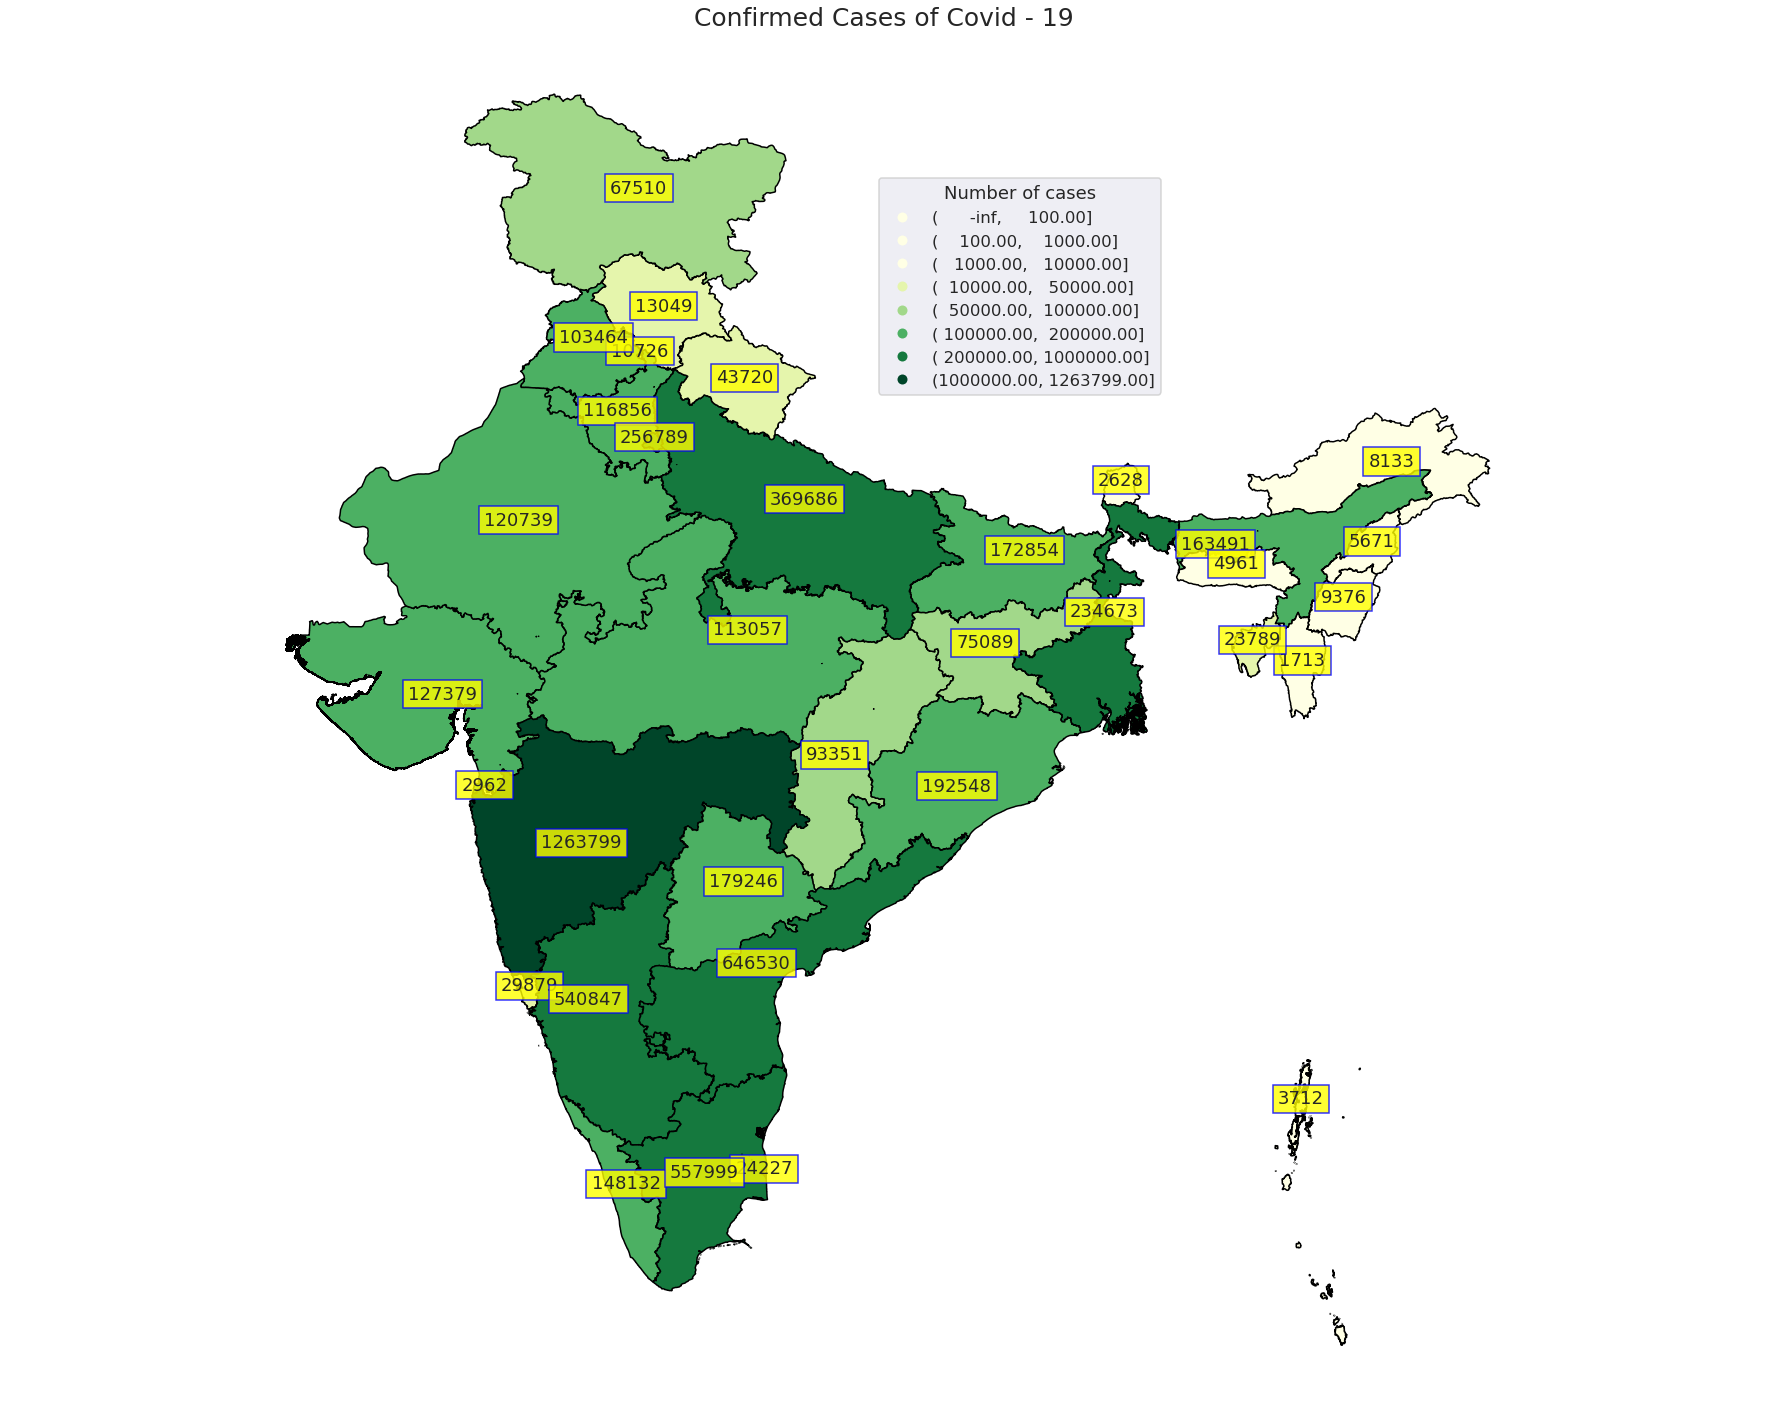

In [131]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'YlGn'
figsize = (25, 20)
ax = merged.plot(column= 'confirmed', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000,200000,1000000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['confirmed'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 5, 'edgecolor':'blue'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of cases')
ax.set_title("Confirmed Cases of Covid - 19 ", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[1]
   # new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    #lbl.set_text(new_text)

ax.set_axis_off()
plt.axis('equal')
plt.show()

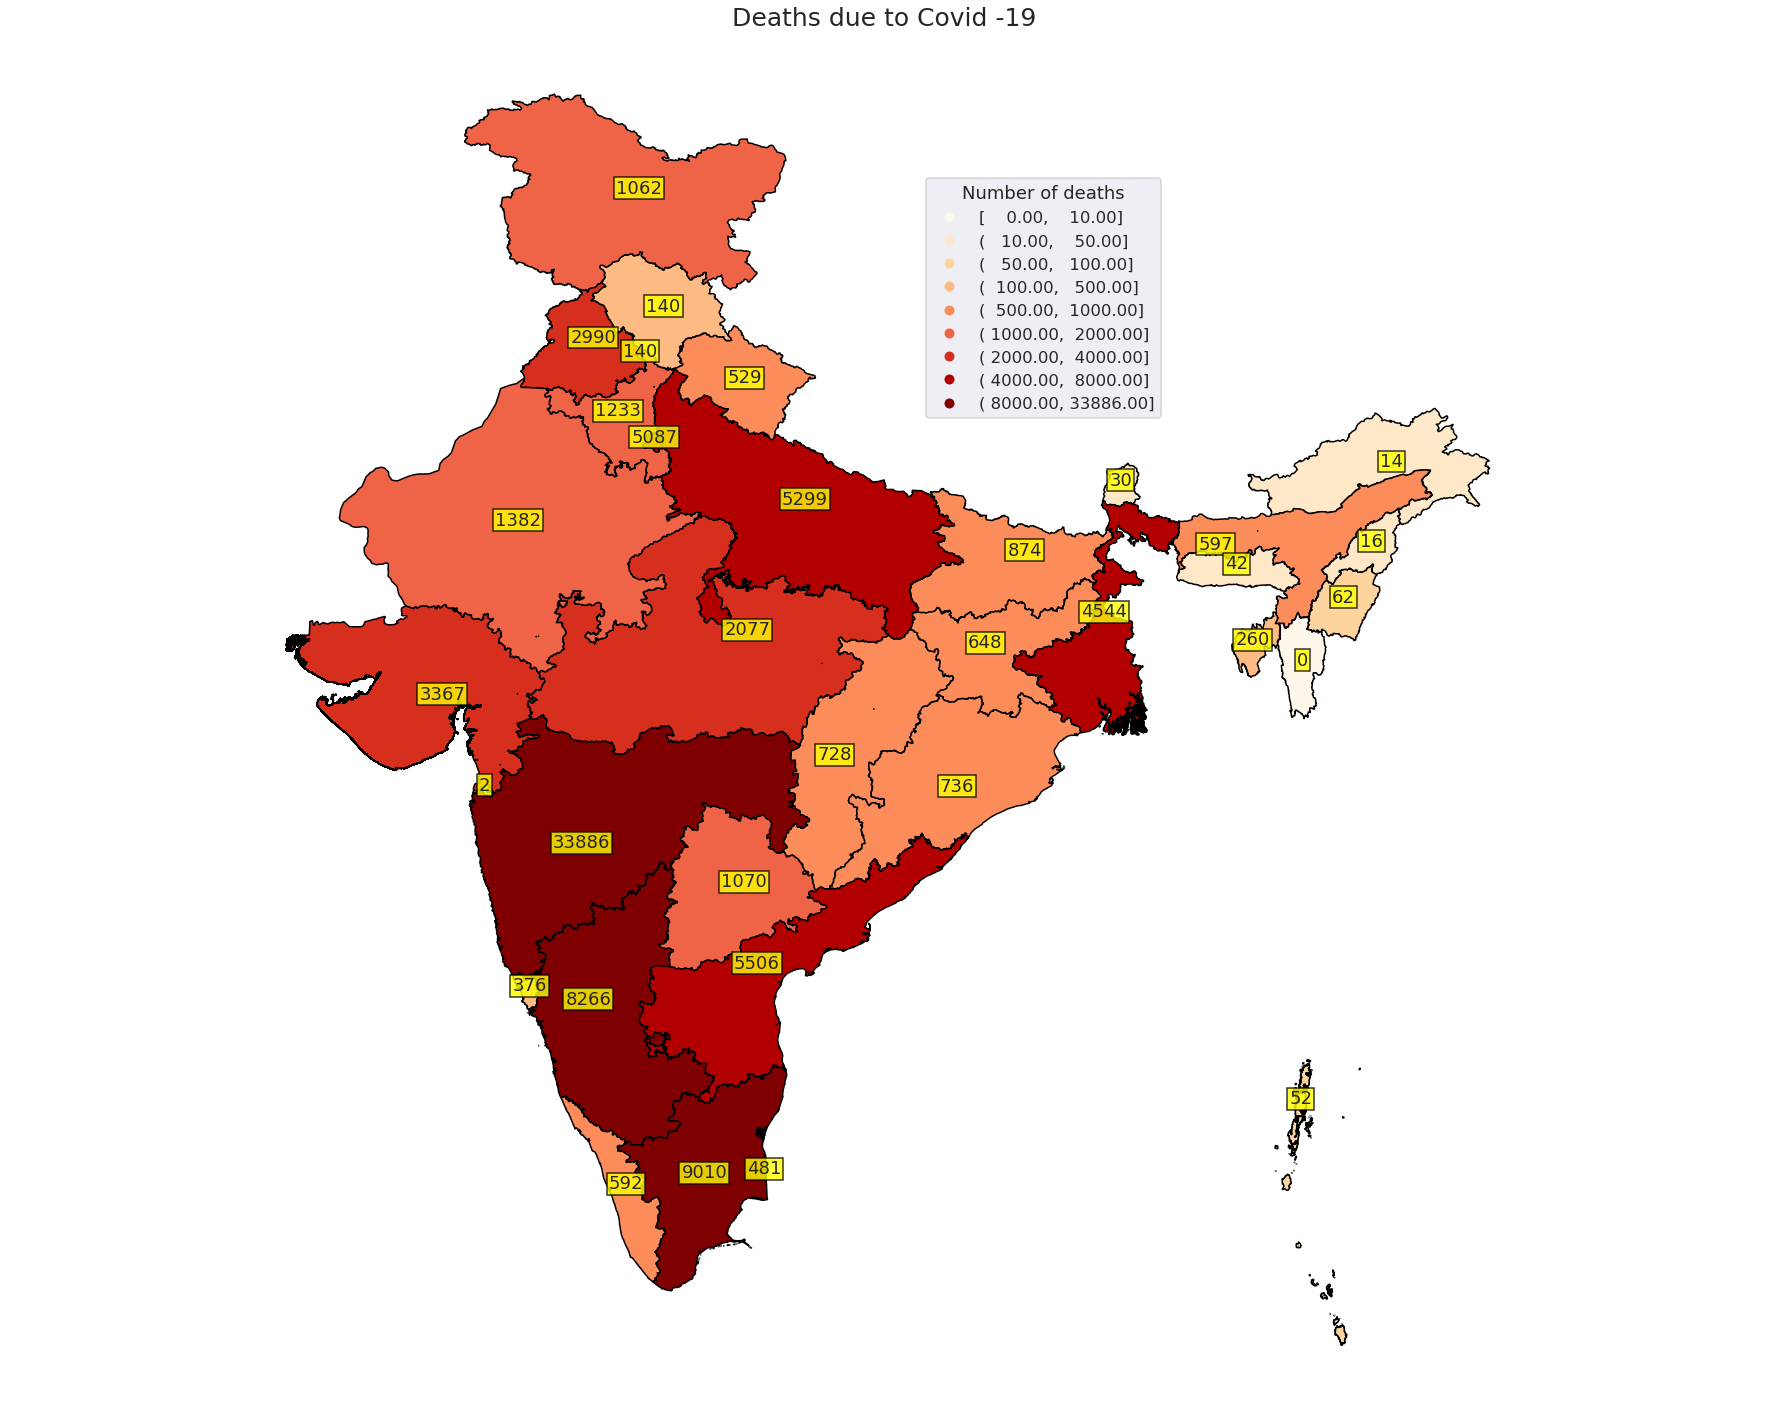

In [132]:

sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'deaths', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[10,50,100,500,1000,2000,4000,8000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['deaths'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of deaths')
ax.set_title("Deaths due to Covid -19 ", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
   # new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    #lbl.set_text(new_text)
#a = ax.text(65, 35, 'Total Deaths \n 16,103',
            #fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

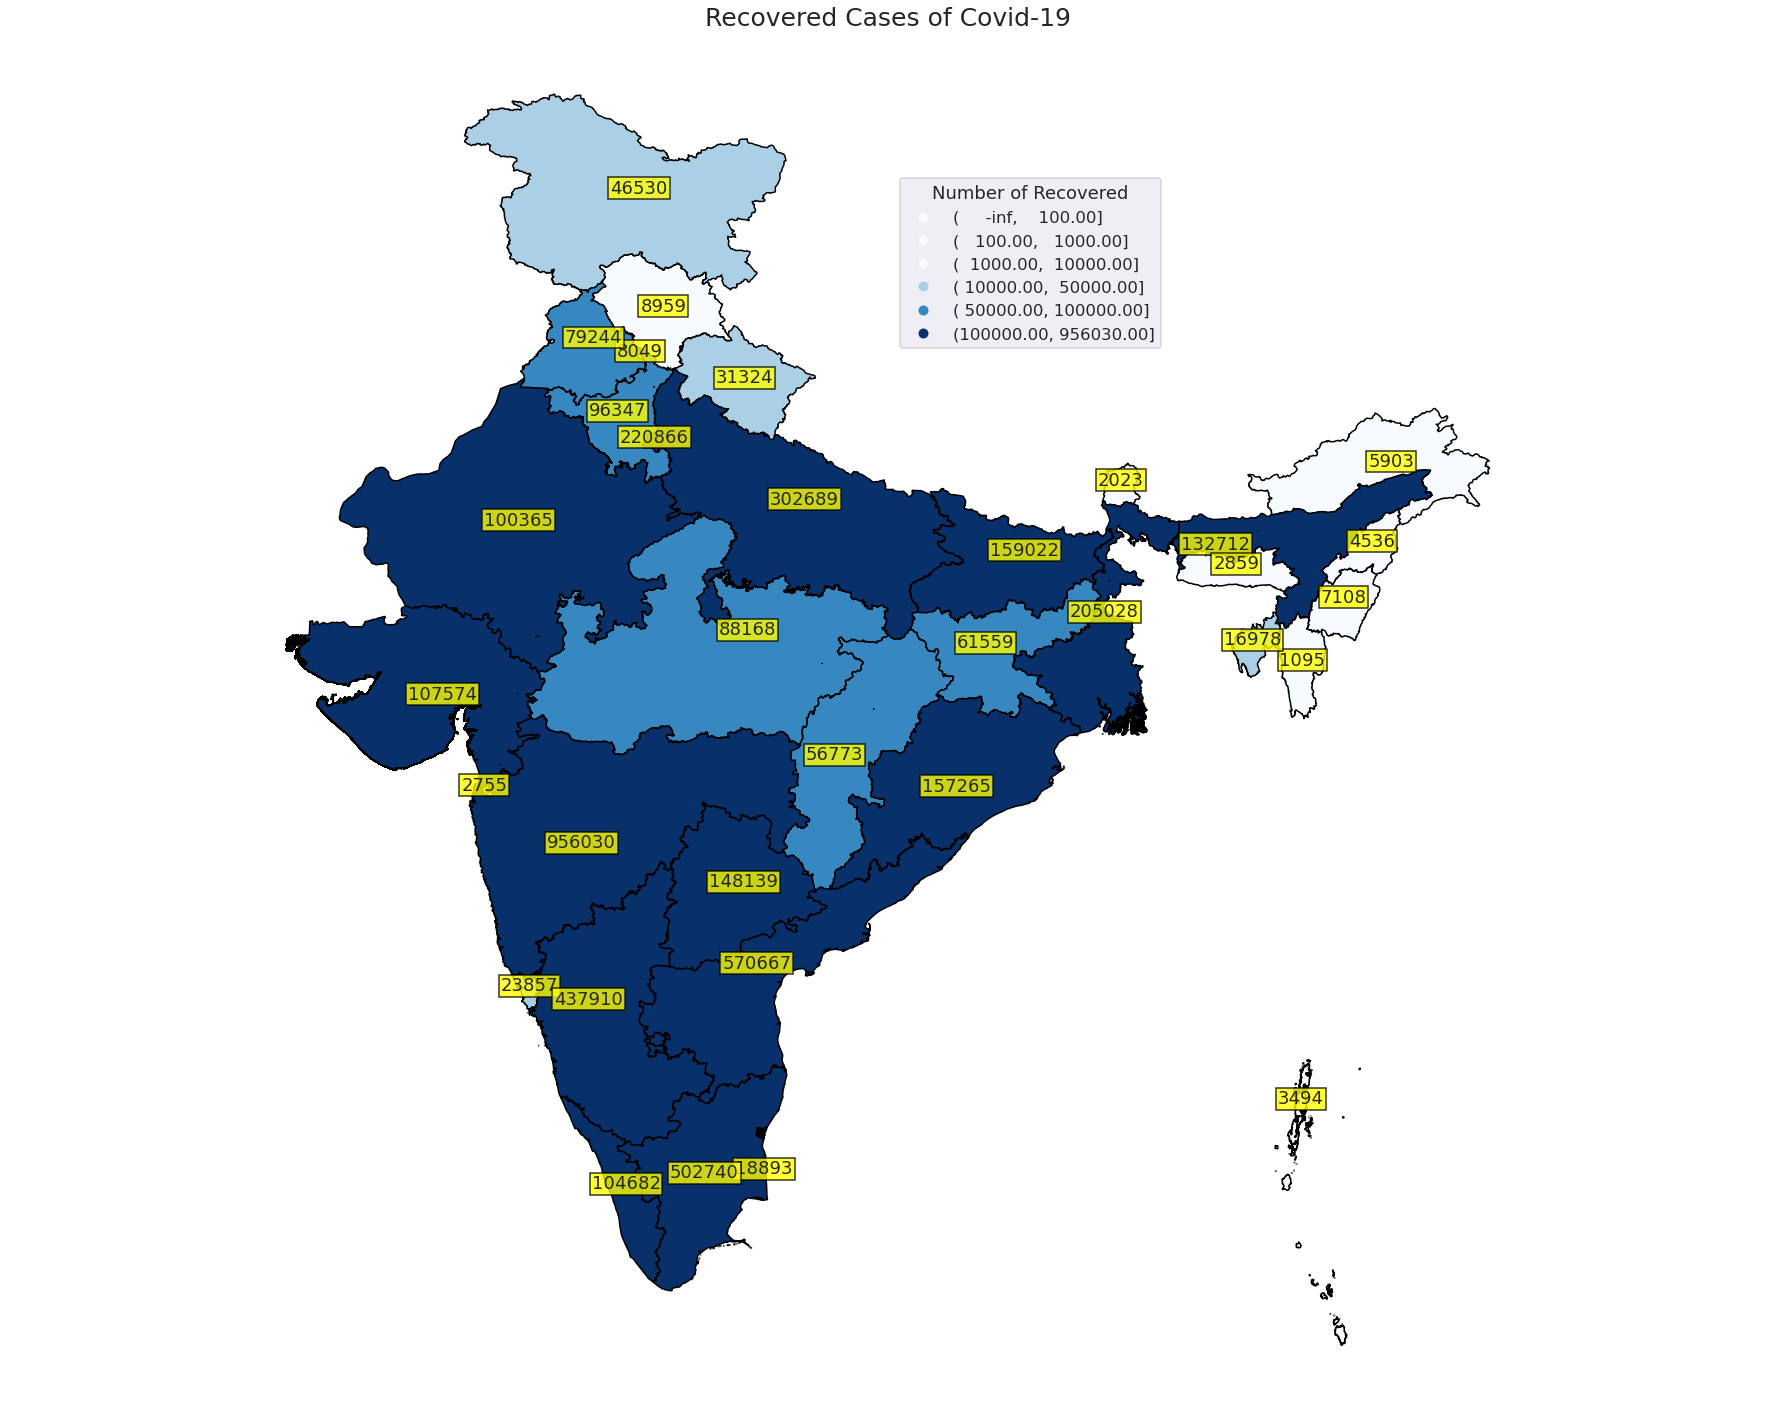

In [133]:



sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Blues'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'cured', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['cured'], 
           horizontalalignment='center', bbox={'facecolor': 'yellow', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of Recovered')
ax.set_title("Recovered Cases of Covid-19", size = 25)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[1]
   # new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    #lbl.set_text(new_text)

#a = ax.text(65, 35, 'Total Recovered \n 310,146',
           # fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

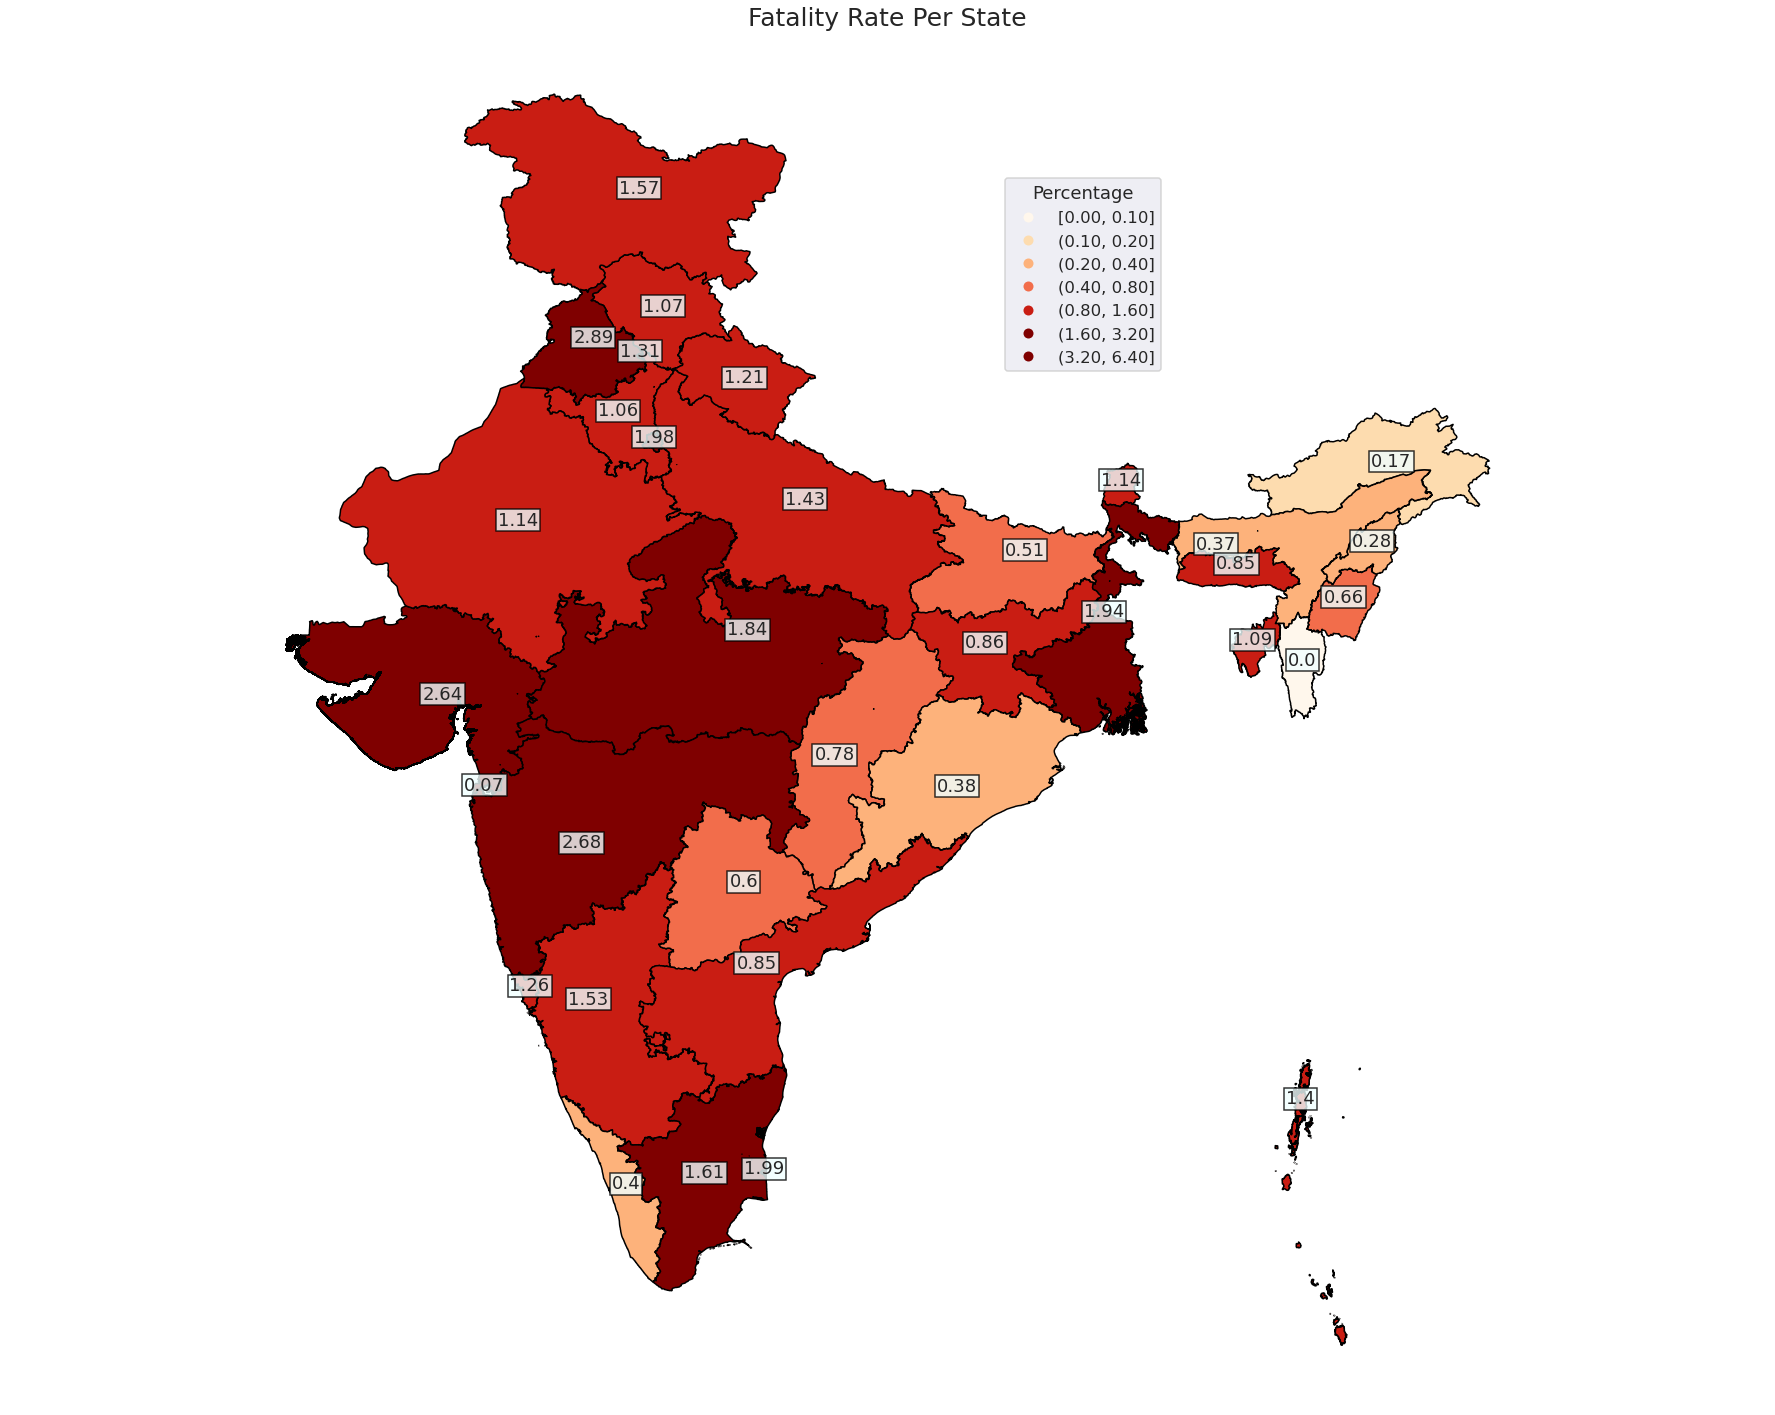

In [134]:
merged['dcratio'] = merged['deaths'] / merged['confirmed'] * 100
merged.dcratio = merged.dcratio.round(2)



sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'dcratio', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[0.1 , 0.2 , 0.4 , 0.8 , 1.6 , 3.2 , 6.4]),
                          
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['dcratio'], 
           horizontalalignment='center', bbox={'facecolor': 'azure', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Percentage')
ax.set_title("Fatality Rate Per State", size = 25)

#a = ax.text(61, 35, 'Total Death/Confirmed \n percentage \n 3.05',
           # fontsize=25,
           # )
ax.set_axis_off()
plt.axis('equal')
plt.show()

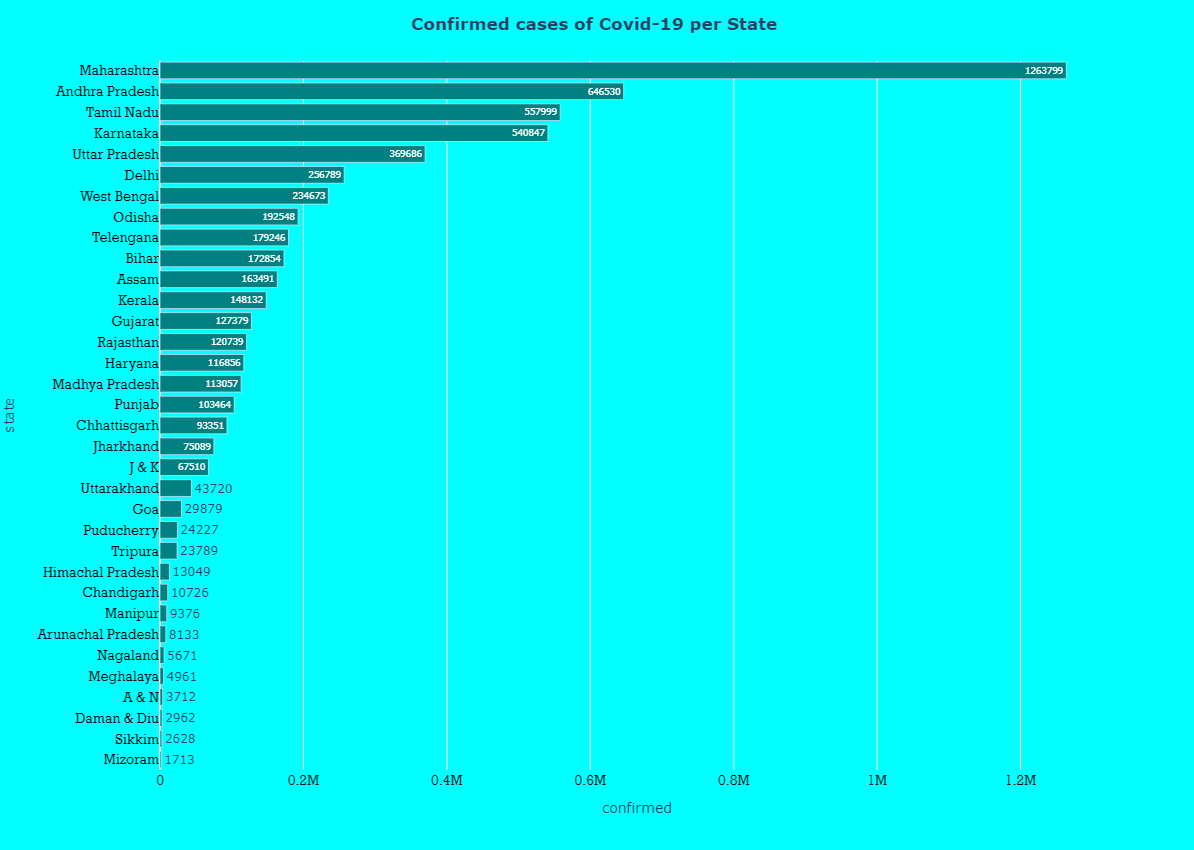

In [135]:
confirmed = merged.sort_values('confirmed', ascending = True)

lowc = confirmed.head(10)
highc = confirmed.tail(10)


fig = px.bar(confirmed, x="confirmed", y="state", orientation='h', text = 'confirmed')
fig.update_layout(
    title_text='<b>Confirmed cases of Covid-19 per State <b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    autosize=False,
    width= 850,
    height=850)
fig.update_traces(marker_color='teal')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

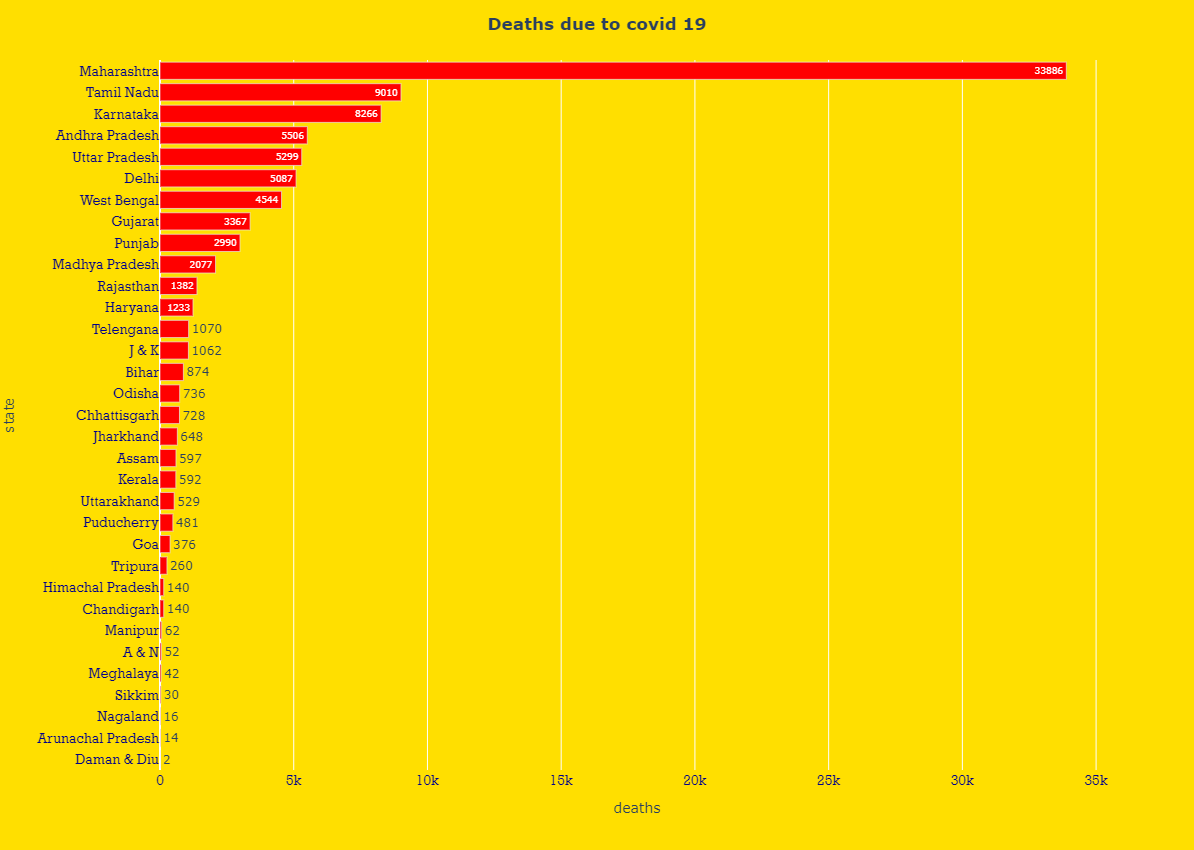

In [136]:
deaths = merged.sort_values('deaths', ascending = True)
deaths = deaths[deaths.deaths > 0 ]
lowd = deaths.head(10)
highd = deaths.tail(10)
fig = px.bar(deaths, x="deaths", y="state", orientation='h', text = 'deaths')
fig.update_layout(
    title_text='<b>Deaths due to covid 19<b>',
    title_x=0.5,
    paper_bgcolor='rgb(255,223,0)',
    plot_bgcolor = "rgb(255,223,0)",
    autosize=False,
    width=850,
    height= 850)
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='darkblue', size=14))
fig.show()

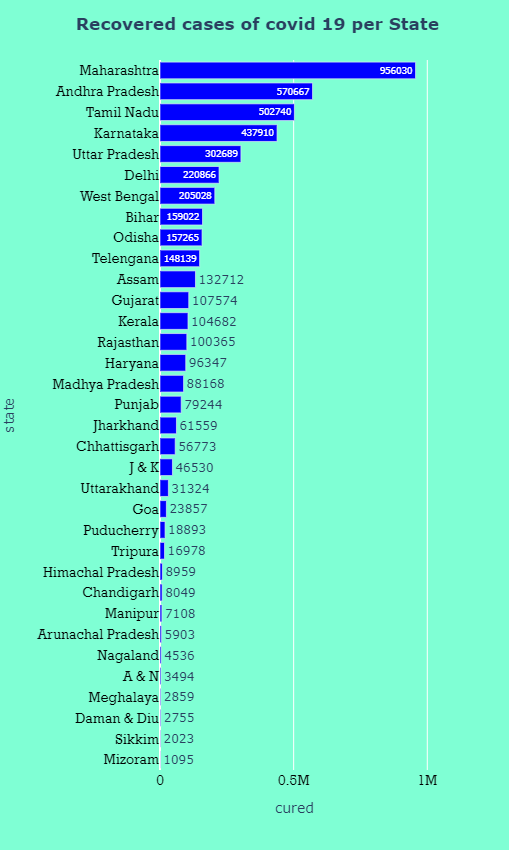

In [137]:
recovered = merged.sort_values('cured', ascending = True)
highr = recovered.head(10)
lowr = recovered.tail(10)

fig = px.bar(recovered, x="cured", y="state", orientation='h', text = 'cured')
fig.update_layout(
    title_text='<b> Recovered cases of covid 19 per State<b>',
    title_x=0.5,
    paper_bgcolor='aquamarine',
    plot_bgcolor = "aquamarine",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='blue')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

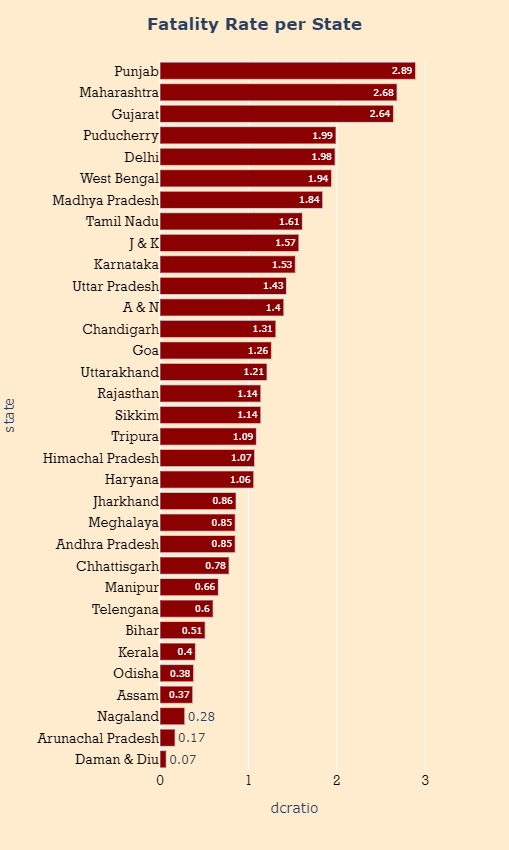

In [138]:
merged = merged[merged.dcratio > 0.0]
merged = merged.sort_values('dcratio', ascending = True)
fig = px.bar(merged, x="dcratio", y="state", orientation='h', text = 'dcratio')
fig.update_layout(
    title_text='<b>Fatality Rate per State<b>',
    title_x=0.5,
    paper_bgcolor='blanchedalmond',
    plot_bgcolor = "blanchedalmond",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='darkred')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

# **Covid-19 Trend Analysis**

In [139]:
#No. of cases daily
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()

In [140]:
#making columns for daily new cases
df2['new_confirmed'] = df2.confirmed.diff()
df2['new_deaths'] = df2.deaths.diff()
df2['new_cured'] = df2.cured.diff()


#taking dates from 15th March
df2 = df2.iloc[44:]

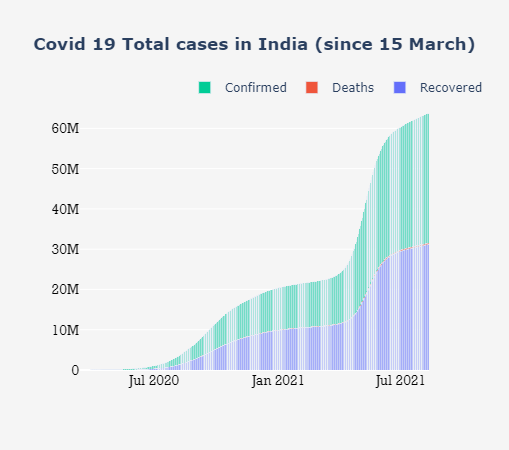

In [141]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.cured, name='Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.deaths, name='Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

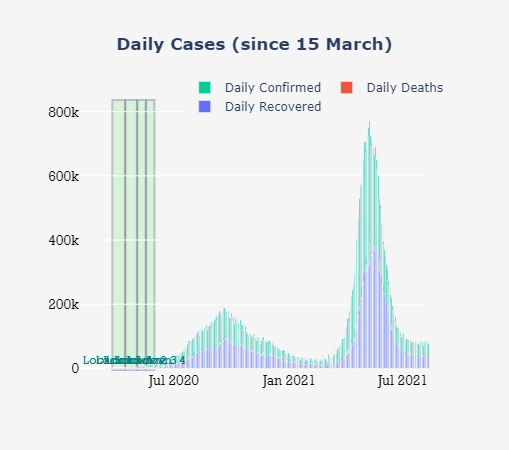

In [142]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.new_cured, name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_deaths, name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.add_annotation(
            x= "2020-04-03",
            y=23000,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=23000,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=23000,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=23000,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 15 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
                  shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()